Determine what factors lead to students getting a placement for a job after graduation. 
    1) Do raw scores matter?
    2) Impact of chosen degree or specialization
    3) Does anythin before college make an impact?
Of those who had job placement
    1) What are contributing factors to salary amount?

In [88]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('/mnt/c/users/ventu/wsl/python/Kaggle/Student Placement/Placement_Data_Full_Class.csv', index_col = 'sl_no')
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


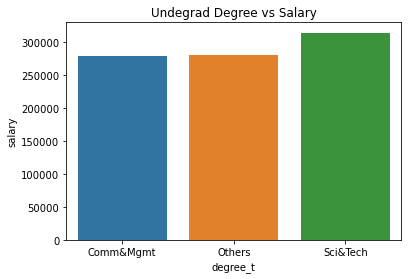

In [90]:
df_placed_only = df.dropna()
# df_placed_only.groupby('degree_t').salary.mean().plot(kind='bar')
# fig = px.bar(df, x='degree_t', y='salary', title='Undergraduate Degree vs Salary')
# fig.show()
df_2 = df_placed_only.groupby('degree_t', as_index=False).salary.mean()
# df_2.reset_index()
# df_2.index
# df_2.reset_index(inplace=True)
sns.barplot(x='degree_t', y='salary', data=df_2).set_title('Undegrad Degree vs Salary')
plt.show()


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

df_copy = df.copy().drop('salary',axis=1)
X = df_copy.drop('status',axis=1)
y = df_copy['status']

cat_cols = [col for col in X.columns if X[col].dtype == 'object']

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe_df = pd.DataFrame(ohe.fit_transform(df[cat_cols]))

ohe_df.index = X.index
num_df = X.drop(cat_cols, axis =1)
post_df = pd.concat([num_df, ohe_df], axis=1)


In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)

In [93]:
train_X, val_X, train_y, val_y = train_test_split(post_df,y)

In [94]:
model = RandomForestClassifier(n_estimators=1000, random_state=0)
model.fit(train_X, train_y)
print(model.score(val_X,val_y))


0.9074074074074074


In [95]:
#Check to see how much only test scores influence placement or not
scores_X = num_df

train_scores_X, val_scores_X, train_scores_y, val_scores_y = train_test_split(scores_X, y)
model_scores = RandomForestClassifier(n_estimators=1000, random_state=0)
model_scores.fit(train_scores_X, train_scores_y)
print(model_scores.score(val_scores_X,val_scores_y))

0.8333333333333334


In [96]:
#Instead of using train test split which can cause overfitting let's use K-Fold cross validation


In [61]:
from sklearn.model_selection import cross_val_score
cv_model = cross_val_score(model, post_df, y, cv=5)
cv_model_scores = cross_val_score(model_scores, num_df, y, cv=5)


In [ ]:
print(f"All inputs top determine placement status: {cv_model.mean()}")
print(f"Only using scores to determine placement status: {cv_model_scores.mean()}")

Next question is for students who were placed, what factors determined salary. Salary has a much larger relative standard deviation compared to other numerical inputs, when looked at with describe().

In [64]:
#Describe shows summary statistics of the numerical categories, relative standard deviation is calculated
df.describe().loc['std']/df.describe().loc['mean']

ssc_p       0.160872
hsc_p       0.164284
degree_p    0.110874
etest_p     0.184131
mba_p       0.093667
salary      0.323768
dtype: float64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB
